In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns

In [58]:
df = pd.read_csv("prepared_data_cont.csv", encoding="utf-8", index_col=0)

# Count concerts in every city
df_cities = df.groupby(["City", "Country"])["Venue"].count().reset_index()
df_cities = df_cities.rename(columns={"Venue" : "Count"})
df_cities = df_cities.merge(df, how="outer", on=["City", "Country"])[["City", "Country", "Count", "Latitude", "Longitude"]].drop_duplicates().reset_index(drop=True)

What does world in world tour means?

Introduction

Inital statistics

- jak dużo
- podział na kontynenty
- podział na państwa
- 

In [3]:
len(df)

7598

In [4]:
df.value_counts("Tour title").count()

53

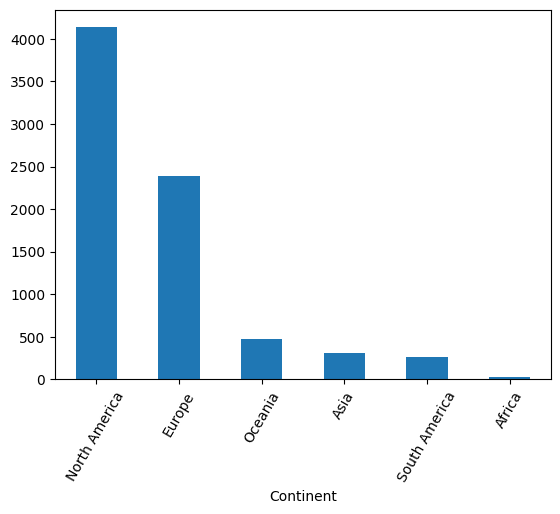

In [13]:
df["Continent"].value_counts().plot(kind="bar")
plt.xticks(rotation=60)
plt.show()

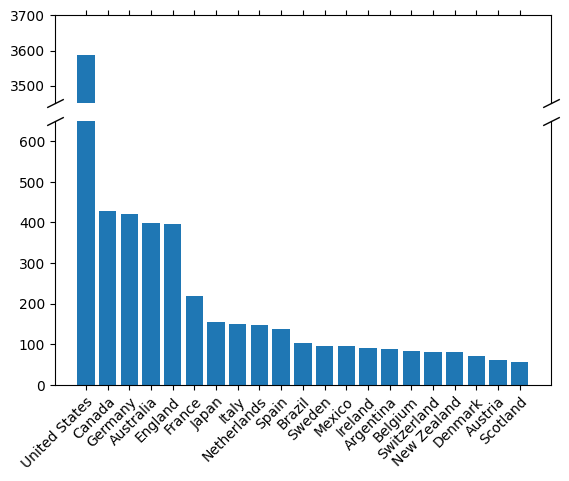

In [112]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.1)  # adjust space between axes


ax1.bar(x = df["Country"].value_counts().index[:21], height = df["Country"].value_counts().iloc[:21])
ax2.bar(x = df["Country"].value_counts().index[:21], height = df["Country"].value_counts().iloc[:21])

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(3450, 3700)  # outliers only
ax2.set_ylim(0, 650)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

kwargs = dict(marker=[(-1, -0.5), (1, 0.5)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()

In [115]:
continents = df["Continent"].unique()

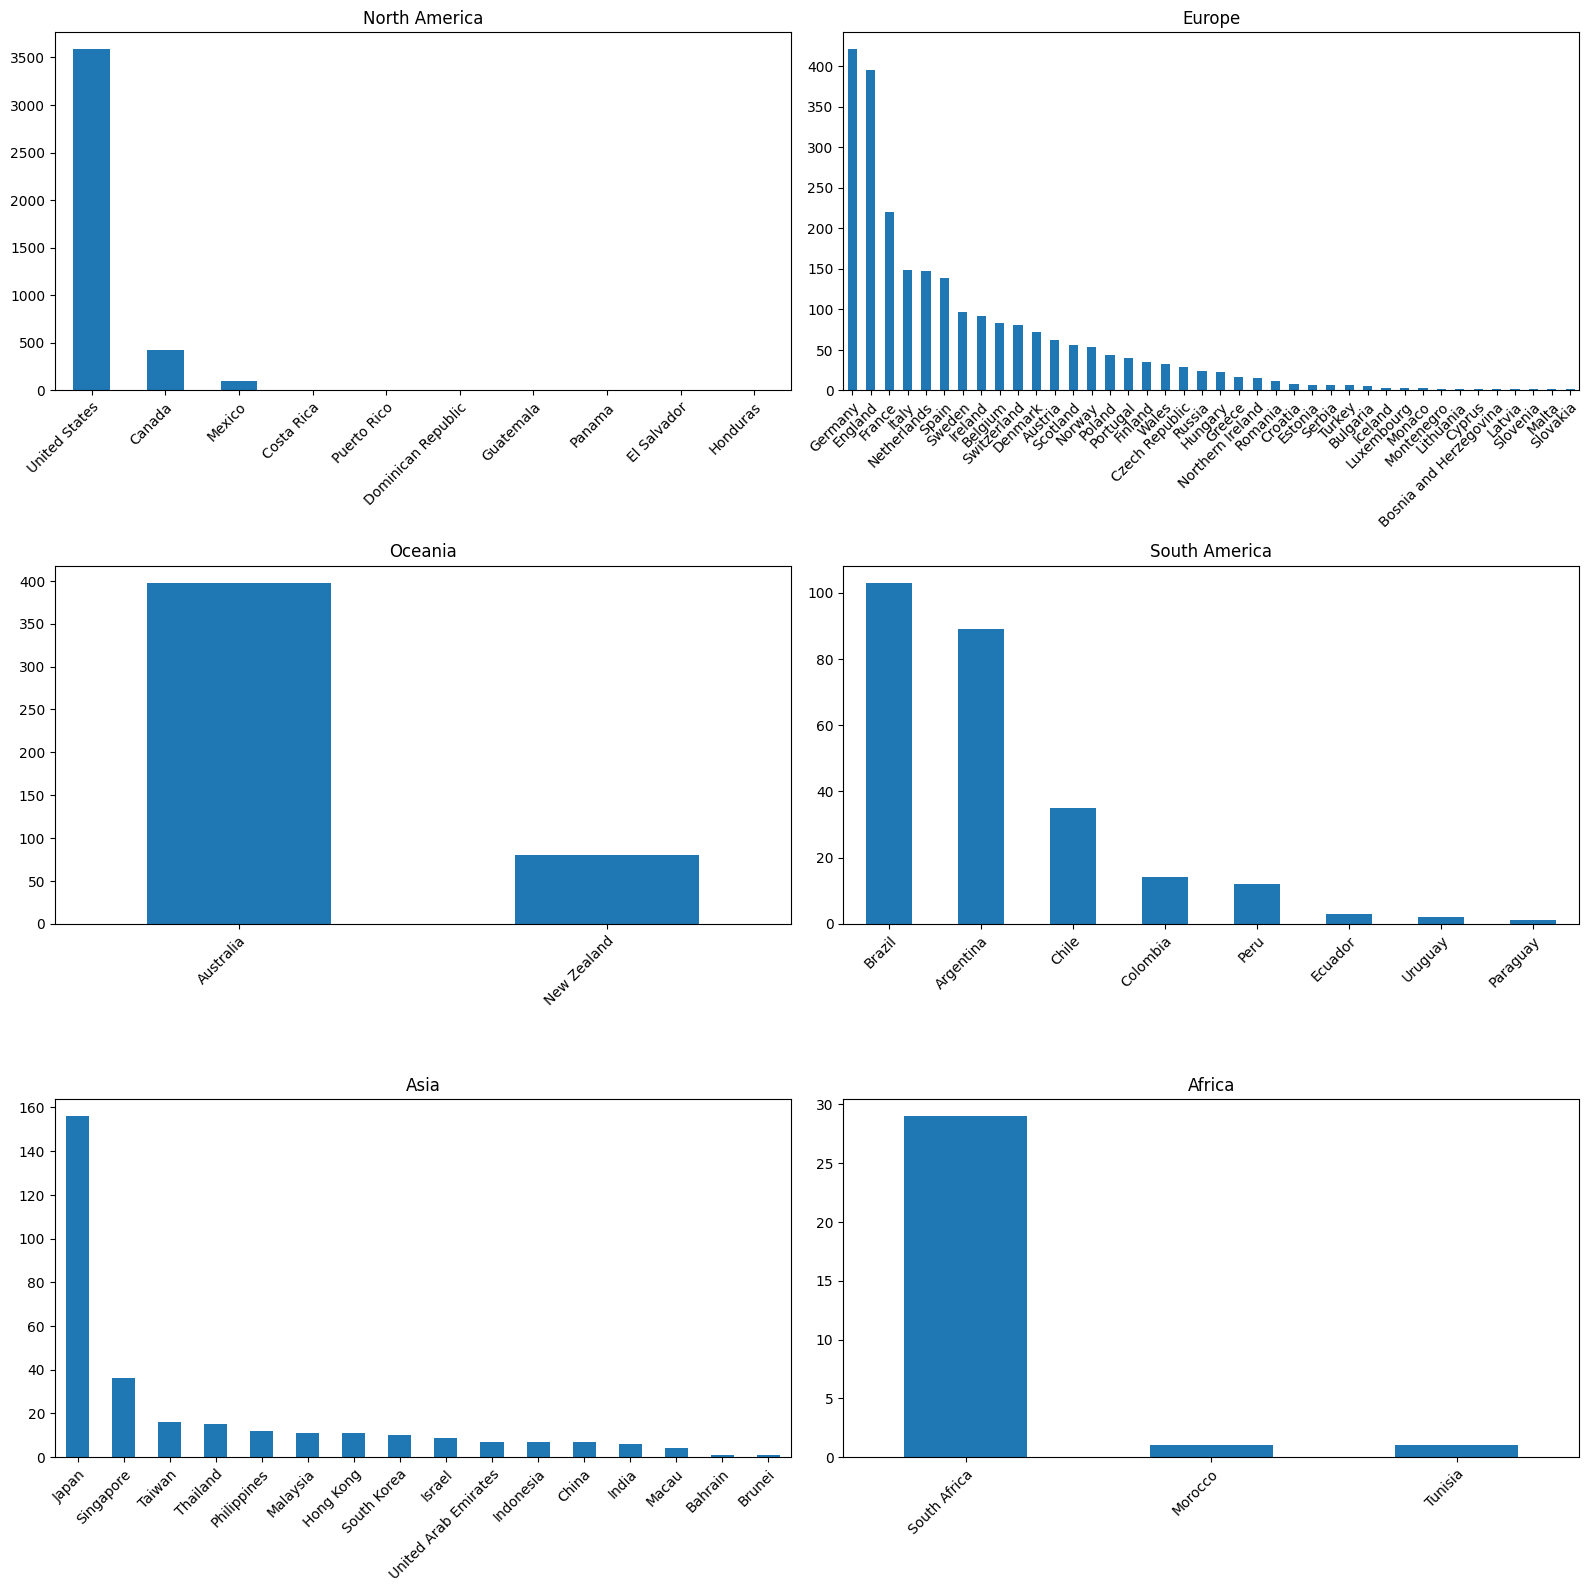

In [148]:
fig, axs= plt.subplots(3,2, figsize=(16,16))

axs = axs.flatten()

for i, c in enumerate(continents):
    axs[i] = df[df["Continent"] == c]["Country"].value_counts().plot(kind="bar", ax=axs[i])
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    axs[i].set_title(c)
    axs[i].set_xlabel("")

fig.tight_layout(pad=1.0)
plt.show()

Wnioski i spostrzeżenia:
- Przytłaczająca liczba koncertów odbyła się w USA i na kontynenncie Amerykańskim.
- Jedynie w trzech krajach afrykańskich, z dużą dysproporcją
- Generalnie na poszczególnych kontynentach występowały duże dysproporcje: szczeólnie w Afryce, NA
- Australia ma nieproporcjonalnie dużo koncertów w stosunku do populacji państwa

Ploty

Jak to wygląda na mapie?

Ciekawostki